# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [16]:
import pandas as pd

df = pd.read_csv('C:\\Users\\miche\\Documents\\Springboard\\Human_Temp_Project\\human_temp\\data\\human_body_temperature.csv')

In [17]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [18]:
df.shape

(130, 3)

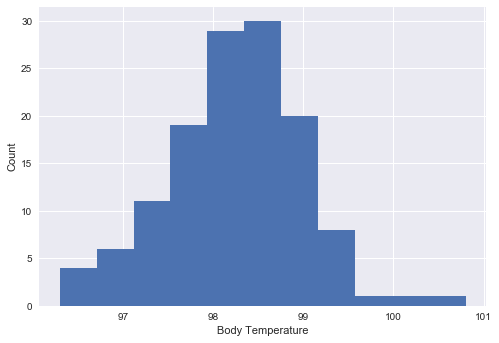

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import seaborn as sns
sns.set()
nbins=np.sqrt(len(df['temperature']))
_=plt.hist(df['temperature'], bins=int(nbins))
_=plt.xlabel('Body Temperature')
_=plt.ylabel('Count')
plt.show()

In [20]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x=np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [21]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


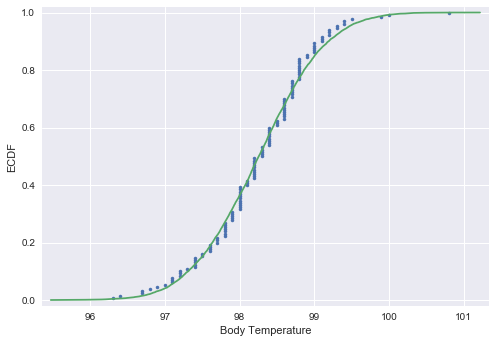

In [22]:
mean=np.mean(df['temperature'])
std=np.std(df['temperature'])
np.random.seed(123)
samples=np.random.normal(mean, std, size=10000)
x_temp, y_temp = ecdf(df['temperature'])
x_norm, y_norm = ecdf(samples)
_=plt.plot(x_temp, y_temp, marker='.', linestyle='none')
_=plt.plot(x_norm, y_norm)
plt.margins(0.02)
_=plt.xlabel('Body Temperature')
_=plt.ylabel('ECDF')
plt.show()

#### 1. The distribution of body temperature is approximately normal. We can seee from the graph above that the data overlays pretty well with the CDF of a normal distribution generated with the mean and std of the data
#### 2. The sample size (n=130) is large and the observations are independent.
#### 3. I would use a one-sample test because we are trying to find out if the true population mean is 98.6 degrees F. The distribution of the data is approximately normal and the sample size is large. In this situation where the Central Limit Theorem applies, we can use the z statistic for the test. Both the z-test and the t-test suggest that that true population mean is not 98.6 degrees F since both yield very small p-values.

In [37]:
# Use z statistic to test
n=len(df)
z=(mean - 98.6)/(std/np.sqrt(n))
p = stats.norm.sf(np.abs(z))*2
print('The z statistic =', z, '\np-value =', p)

The z statistic = -5.47592520208 
p-value = 4.35231516588e-08


In [14]:
#Use t statistic to test 
stats.ttest_1samp(df['temperature'], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

#### 4. At what temperature should we consider someone's temperature to be "abnormal"? 
We can consider someone's temperature to be abnormal outside the 95% confidence interval of [98.123682111456645, 98.37477942700491]

In [44]:
#Compute margin of error and 95% confidence interval
m=stats.norm.ppf(0.975)*std/np.sqrt(n)
ci =[mean-m, mean+m]
print('Margin of error =', m, "\n95% confidence interval =", ci)

Margin of error = 0.125548657774 
95% confidence interval = [98.123682111456645, 98.37477942700491]


#### 5. The two-sample t test is applied to determine the whether the difference in mean body temperature between male and female is siginification. The small p-value (<0.05) suggests that the difference in mean body temperatures between male and female is statistically significant.

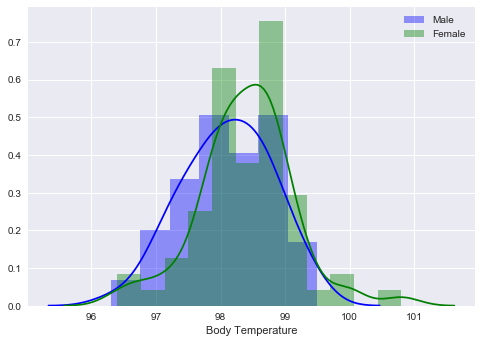

In [12]:
female_temp = df[df['gender'] == 'F']['temperature']
male_temp = df[df['gender'] == 'M']['temperature']
sns.distplot(male_temp, color='b', label='Male')
sns.distplot(female_temp, color='g', label='Female')
plt.xlabel('Body Temperature')
plt.legend()
plt.show()

##### The distribution of the male and female body temperature seem to suggest there is significant difference in the normal temperature between the two. I would investigate further using the two-sample t test

In [13]:
# Use two-sample t test to determine whether the difference in mean body temperature between male and female is significant
stats.ttest_ind(female_temp, male_temp) 

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)